In [92]:
# 1.  Load images and set weights.
import numpy as np
from imageio import imread

blocksize=8

In [93]:
def crop(image,xborder,yborder):
    return image[xborder:image.shape[0]-xborder,yborder:image.shape[1]-yborder]

In [94]:
from glob import glob
sigilfiles = glob('../sigilbank/png/256/*.png')

sigils  = {}
for sigilfile in sigilfiles:
    sigil = imread(sigilfile)[:,:,0:3]
    # Crop sigilfile.
    sigil = crop(sigil,76,76)
    # Add to dictionary.
    sigils[sigilfile[21:-4]] = sigil.copy()

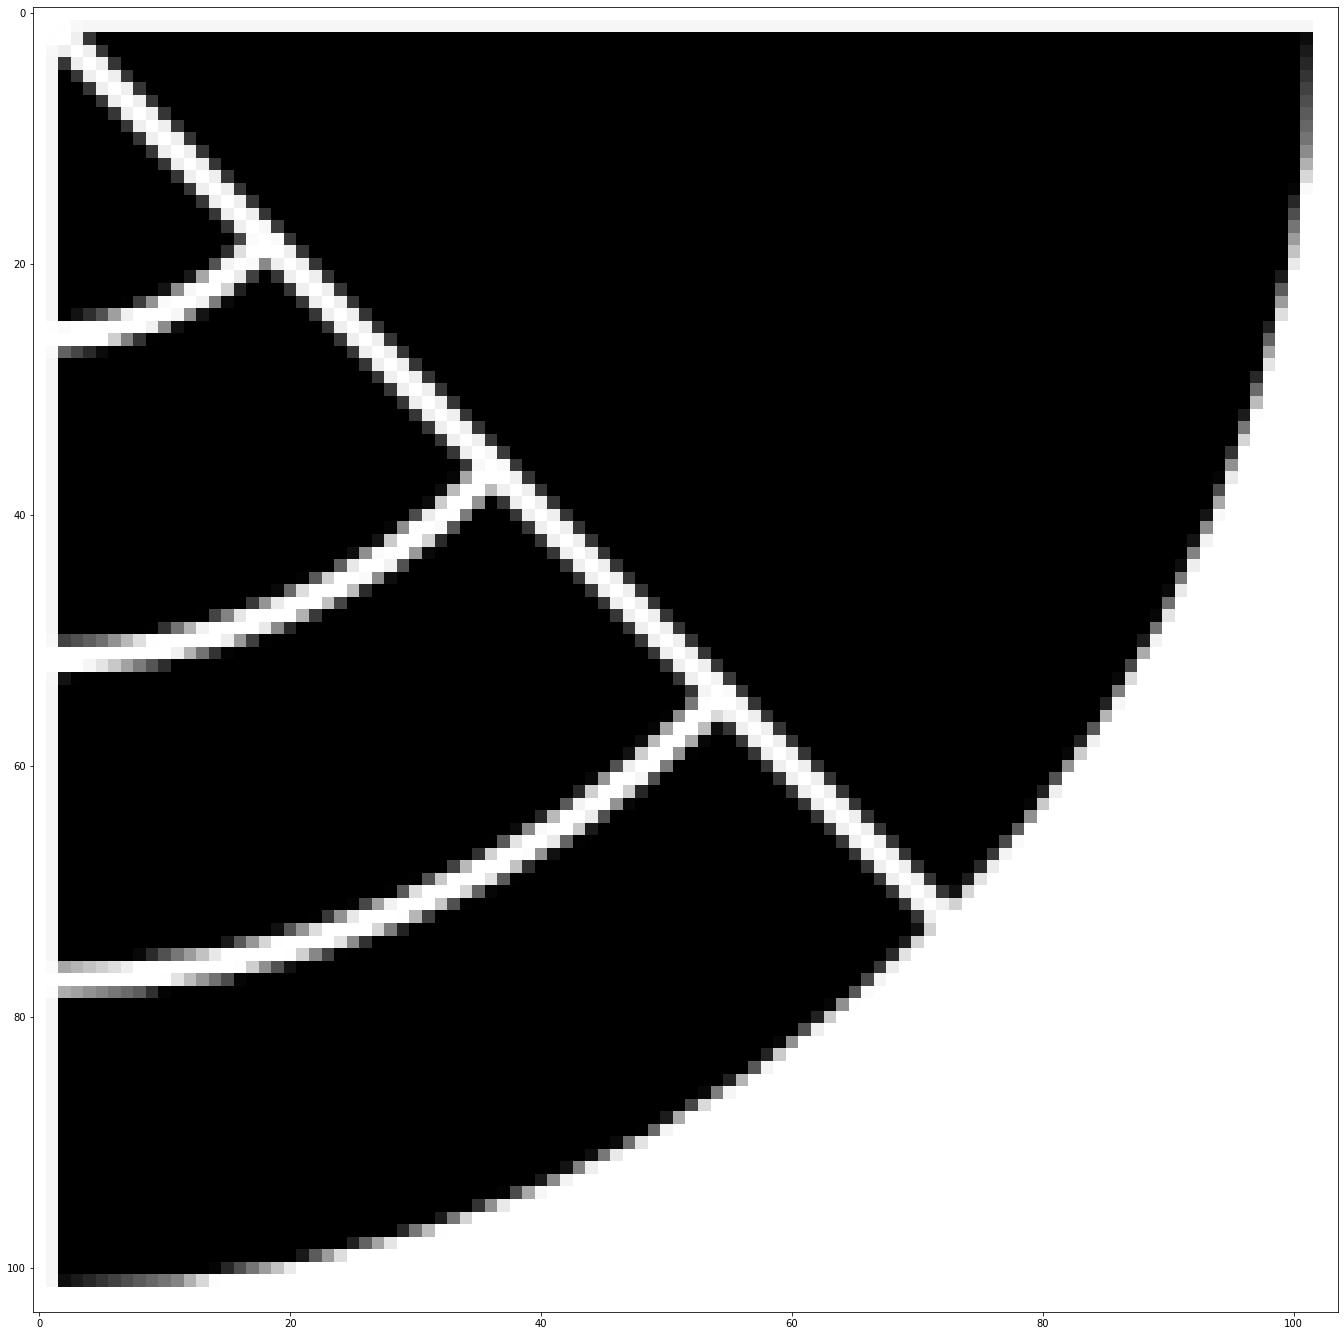

In [95]:
import matplotlib.pyplot as plt
plt.imshow(sigils['fyl'])
plt.show()

In [96]:
from cv2 import resize,INTER_CUBIC

weights = {}
for sigil in sigils:
    weight = resize(sigils[sigil],dsize=(blocksize,blocksize),interpolation=INTER_CUBIC)
    weights[sigil] = weight

In [97]:
weights

{'rum': array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [217, 217, 217],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [253, 253, 253]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,

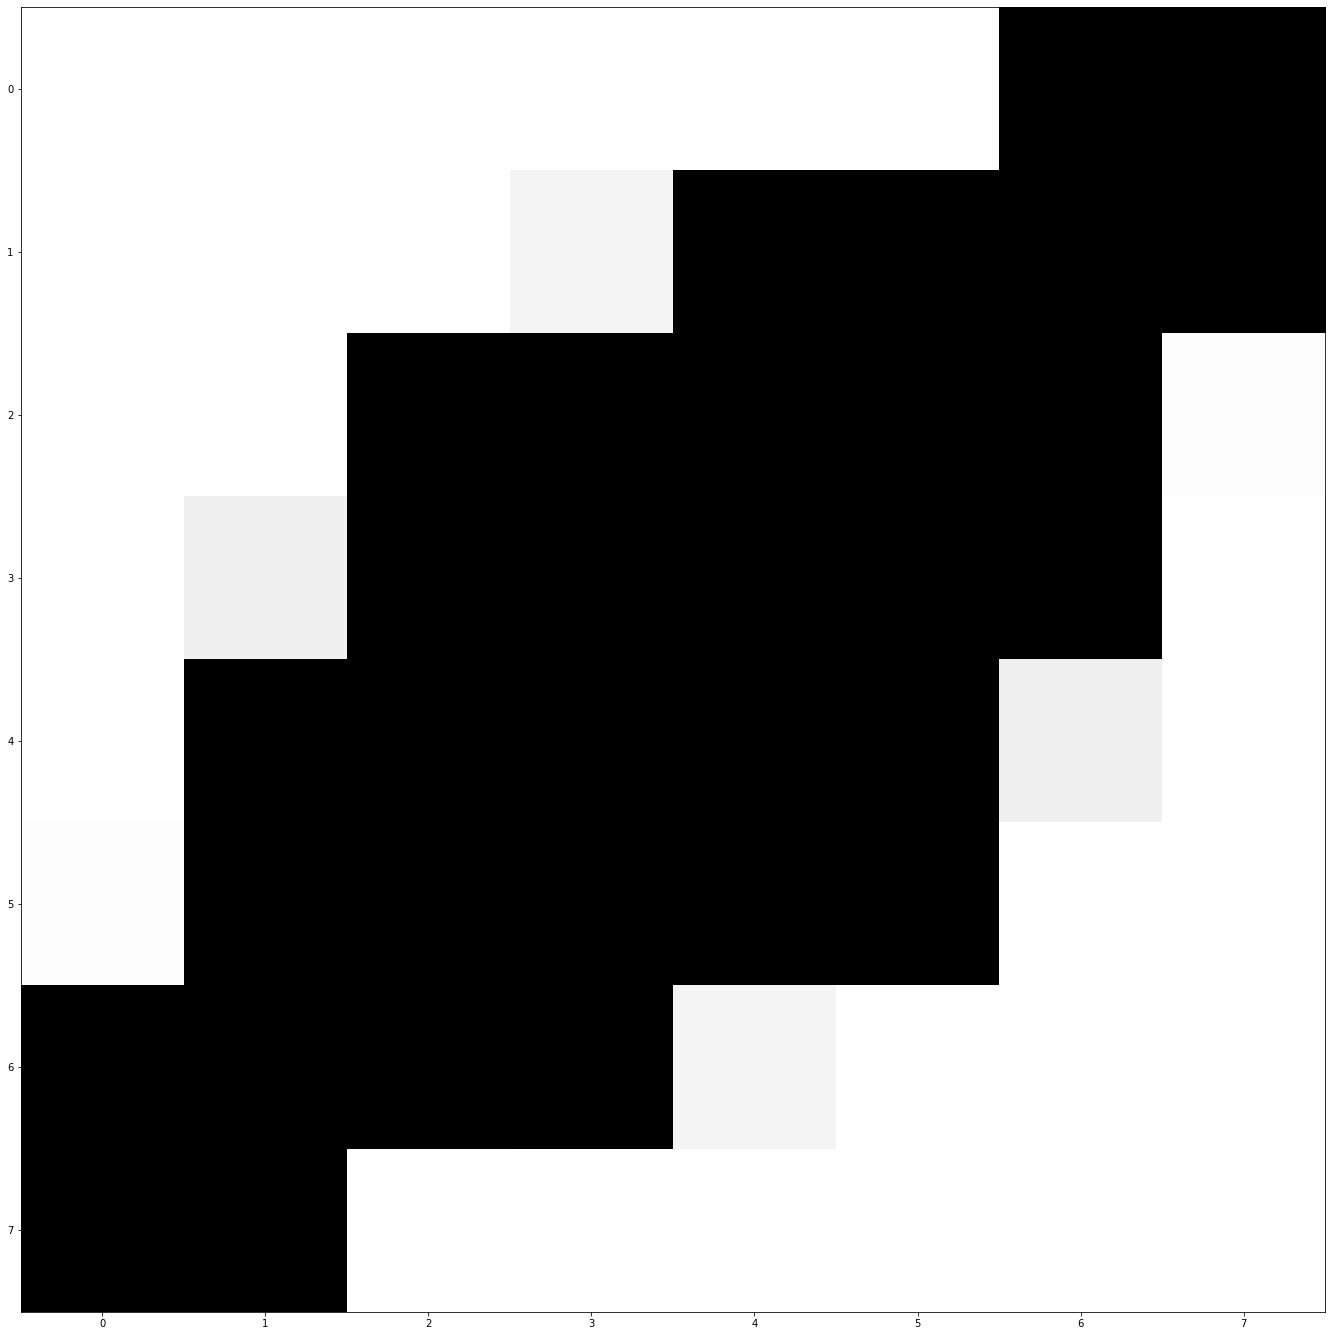

In [98]:
plt.imshow(weights['rel'])
plt.show()

In [99]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def distance(arr1,arr2):
    return np.sum(np.abs(rgb2gray(arr1)-rgb2gray(arr2)))

def match(target,sources):
    best_match = 'bal'
    best_distance = 1e8
    for key in sources:
        d = distance(sources[key],target)
        if d < best_distance:
            best_match = key
            best_distance = d
    return best_match

In [100]:
# Scan through images in blocks of blocksize×blocksize pixels.
# Match each one to a weight.

source = imread('terminator.png')
source = source.astype(dtype=np.uint8)
print(source.shape)
for row in range(source.shape[0]):
    for col in range(source.shape[1]):
        if source[row,col,:].shape != (1,1,4): break
        if source[row,col,:][-1] == 0:  source[row,col] = (0,0,0,0)
source = source[:,:,0:3]

if (source.shape[0]%blocksize != 0) or (source.shape[1]%blocksize != 0): assert False,f'Image must be divisible by {blocksize}.'

result = np.array([['' for y in range(0,source.shape[1],blocksize)] for x in range(0,source.shape[0],blocksize)],dtype=object)

from itertools import product
for xindex,yindex in product(range(0,source.shape[0],blocksize),range(0,source.shape[1],blocksize)):
    image_weight = source[xindex:xindex+blocksize,yindex:yindex+blocksize]
    result[xindex//blocksize,yindex//blocksize] = match(image_weight,weights)

(256, 256, 3)


In [84]:
result

array([['fin', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin',
        'reg', 'nep', 'pat', 'fin', 'fin', 'fin', 'fin'],
       ['fin', 'fin', 'fin', 'fin', 'fin', 'seg', 'fin', 'fin', 'seg',
        'fin', 'fin', 'dyl', 'nep', 'fin', 'fin', 'fin'],
       ['fin', 'fin', 'fin', 'fin', 'fin', 'lod', 'seg', 'fur', 'nyd',
        'fal', 'hid', 'ral', 'lat', 'fin', 'fin', 'fin'],
       ['fin', 'fin', 'fin', 'fin', 'seb', 'fin', 'byt', 'fal', 'lyd',
        'lyd', 'fal', 'lon', 'lon', 'fin', 'fin', 'fin'],
       ['fin', 'deg', 'hav', 'fin', 'fin', 'fin', 'byt', 'nyd', 'lyd',
        'dal', 'lyd', 'hes', 'mog', 'fin', 'fin', 'fin'],
       ['fin', 'fin', 'lod', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin',
        'fin', 'fin', 'fin', 'fin', 'fin', 'fin', 'fin'],
       ['lup', 'sid', 'lod', 'fin', 'fin', 'fin', 'fin', 'peg', 'fin',
        'ryx', 'bat', 'fin', 'len', 'fin', 'fin', 'fin'],
       ['lup', 'bot', 'lod', 'fin', 'fin', 'fin', 'fin', 'seg', 'len',
        'pic', 'mog', 'fin

In [106]:
# Convert back to an image composed of sigils.
from glob import glob
sigilfiles = glob('../sigilbank/png/64/*.png')

sigils  = {}
for sigilfile in sigilfiles:
    sigil = imread(sigilfile)[:,:,0:3]
    # Crop sigilfile.
    sigil = crop(sigil,18,18)
    # Add to dictionary.
    sigils[sigilfile[-7:-4]] = sigil.copy()

target = np.zeros((result.shape[0]*sigils['bal'].shape[0],result.shape[1]*sigils['bal'].shape[1],3))
xint = sigils['bal'].shape[0]
yint = sigils['bal'].shape[1]
for r,row in enumerate(result):
    for c,col in enumerate(row):
        #print(source[r,c])
        target[r*xint:r*xint+xint,c*yint:c*yint+yint] = sigils[result[r,c]] #*source[r*4,c*4]/256

In [102]:
sigils['bal'].shape
result.shape

(32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


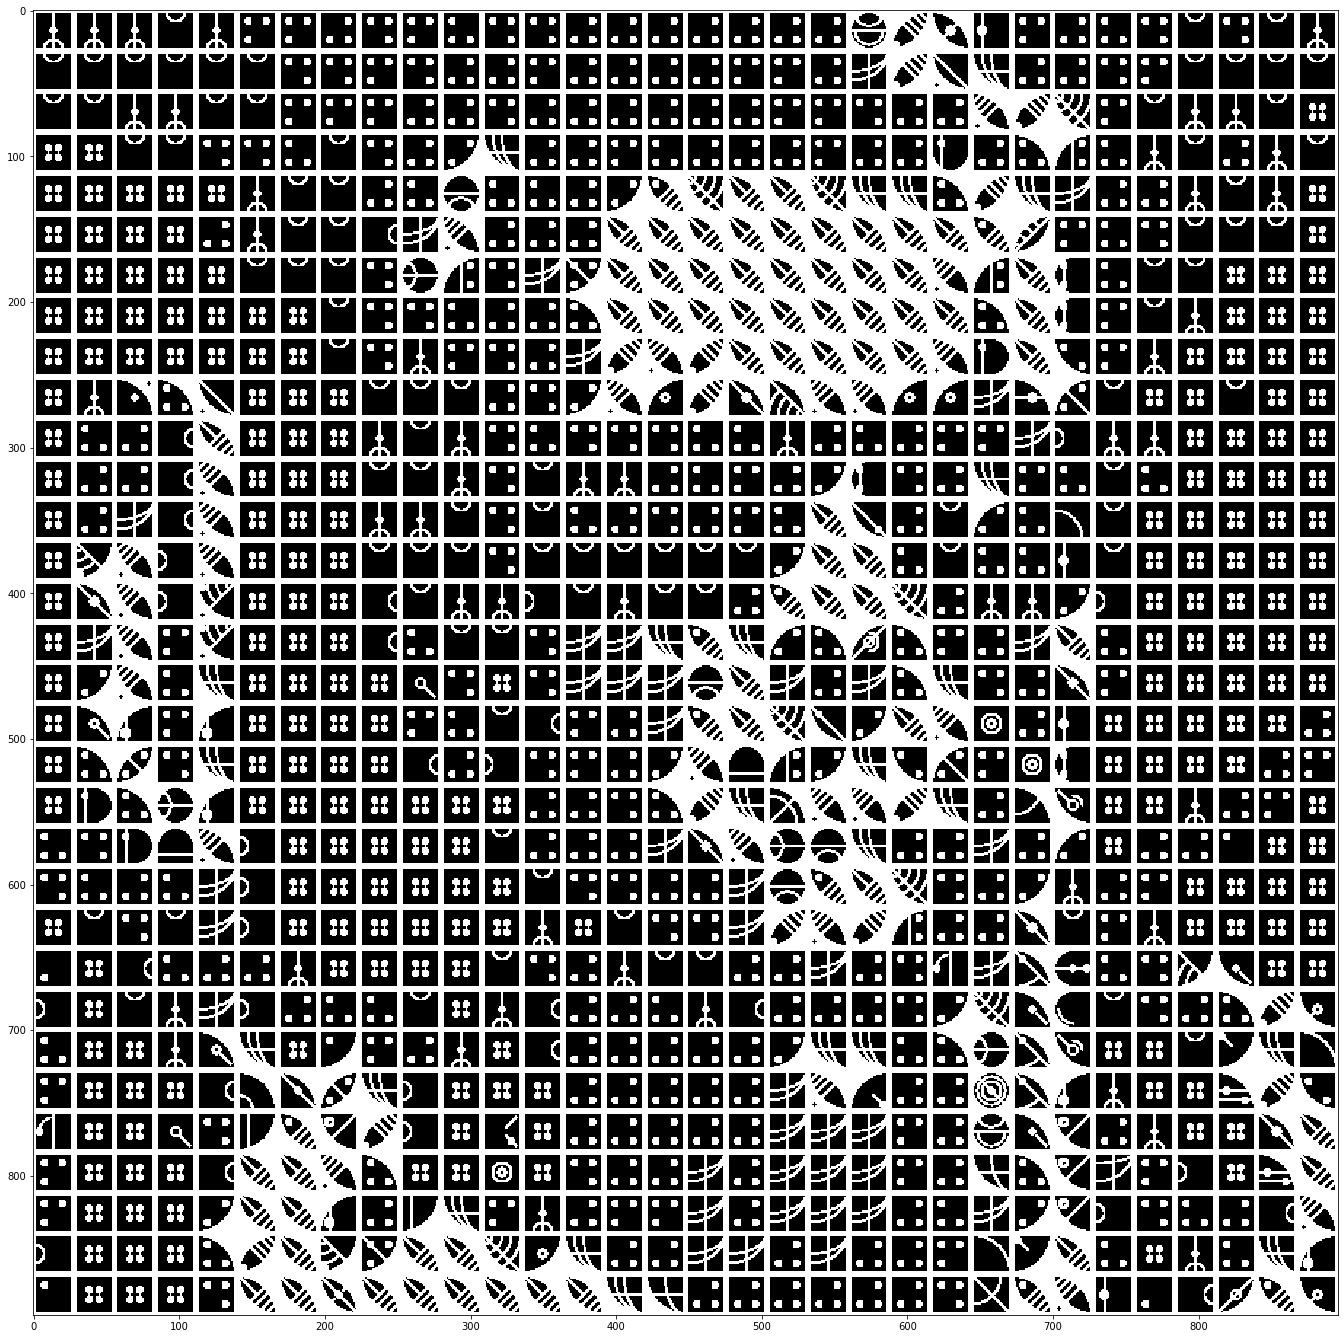

In [107]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(24,24)
plt.imshow(target)

In [108]:
target.shape

(896, 896, 3)

In [109]:
from imageio import imwrite
imwrite('output.png',target)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [114]:
# Convert back to an image composed of sigils.
from glob import glob
sigilfiles = glob('../sigilbank/png/64/*.png')

sigils  = {}
for sigilfile in sigilfiles:
    sigil = imread(sigilfile)[:,:,0:3]
    # Crop sigilfile.
    sigil = crop(sigil,19,19)
    # Add to dictionary.
    sigils[sigilfile[-7:-4]] = sigil.copy()

target = np.zeros((result.shape[0]*sigils['bal'].shape[0],result.shape[1]*sigils['bal'].shape[1],3))
xint = sigils['bal'].shape[0]
yint = sigils['bal'].shape[1]

for r,row in enumerate(result):
    for c,col in enumerate(row):
        #print(source[r*blocksize,c*blocksize])
        #print(sigils[result[r,c]])
        #print((255-sigils[result[r,c]]))
        #value = ((255-sigils[result[r,c]])*source[r*blocksize,c*blocksize]/256)*sigils[result[r,c]]
        #print(value)
        target[r*xint:r*xint+xint,c*yint:c*yint+yint] = 255-((255-sigils[result[r,c]])*source[r*blocksize,c*blocksize]/256)
        #target[r*xint:r*xint+xint,c*yint:c*yint+yint] = sigils[result[r,c]] #*source[r*4,c*4]/256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


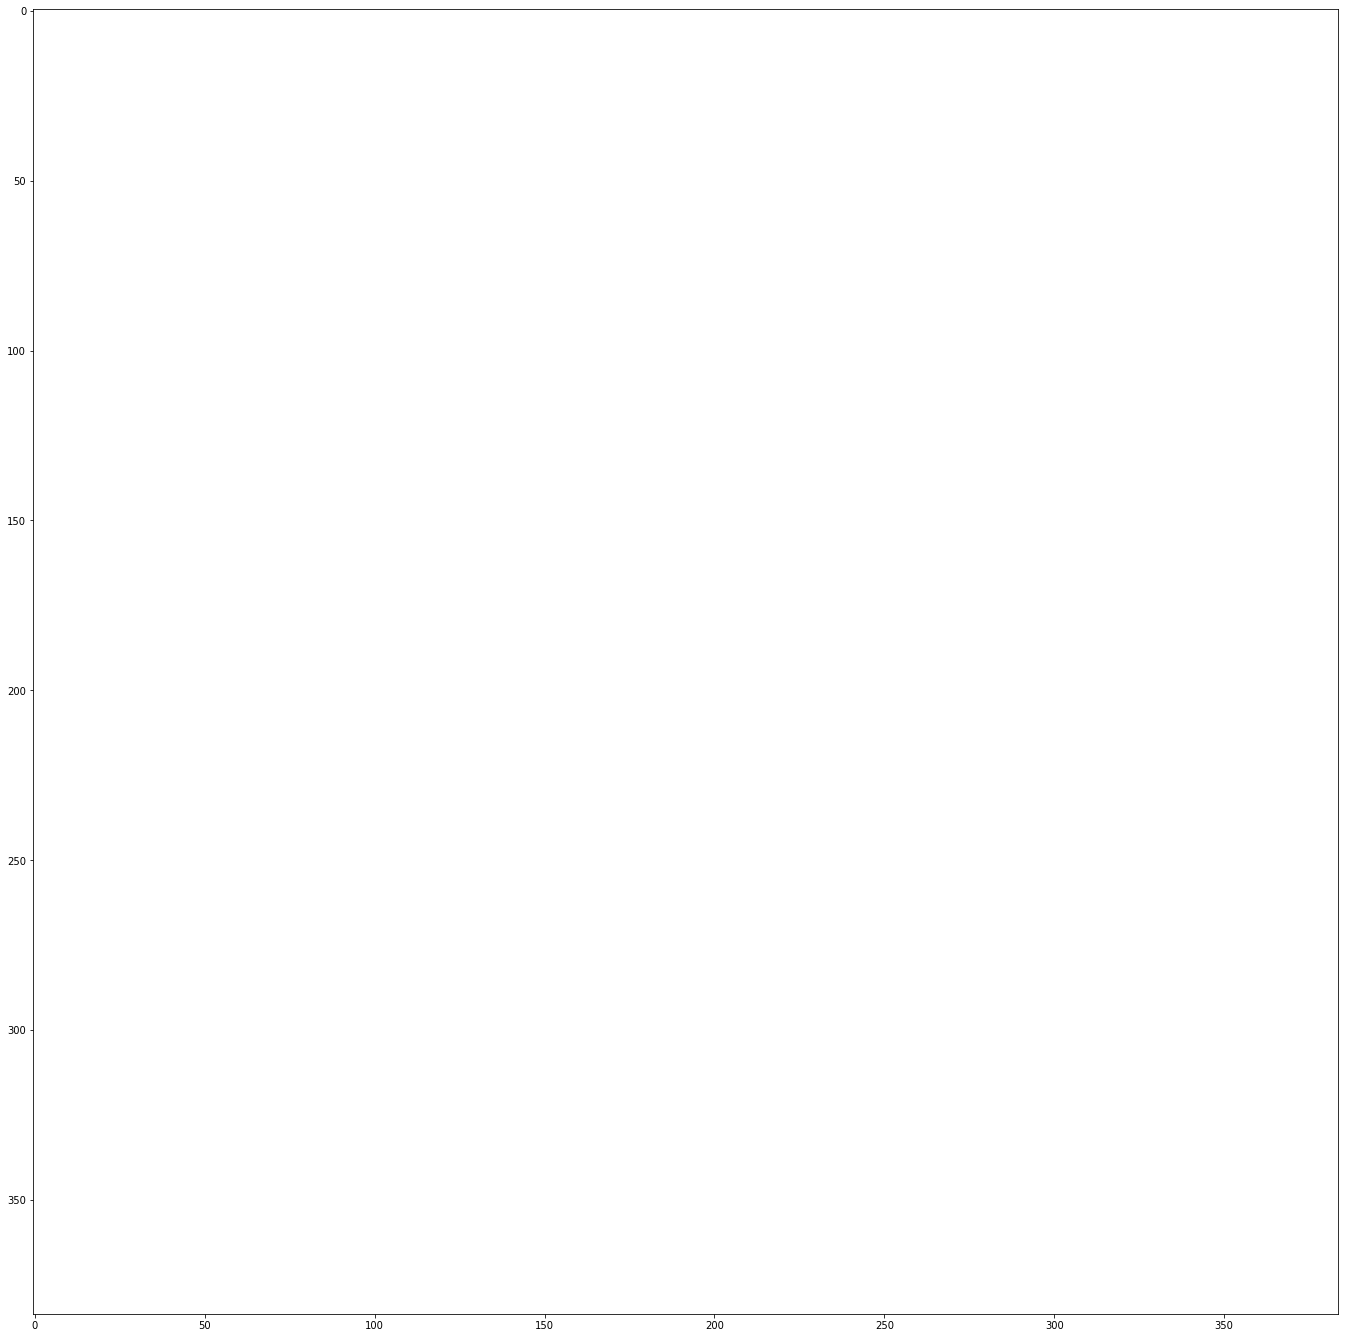

In [89]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(24,24)
plt.imshow(target)

In [90]:
target

array([[[254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        ...,
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ]],

       [[254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        ...,
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ]],

       [[254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        [254.10546875, 254.1015625 , 254.0859375 ],
        ...,
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ],
        [254.1484375 , 254.12890625, 254.1171875 ]],

       ...,

      

In [115]:
from imageio import imwrite
imwrite('output.png',target)

Lossy conversion from float64 to uint8. Range [254.00390625, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
